In [44]:
import pandas as pd

# Replace with your actual data
dollar_df = pd.read_csv('USD_LKR Historical Data.csv')
dollar_df['date'] = pd.to_datetime(dollar_df['Date'])
dollar_df['year_month'] = dollar_df['date'].dt.to_period('M')
monthly_dollar_rate_avg = dollar_df.groupby('year_month')['Price'].mean().reset_index()
monthly_dollar_rate_avg.set_index('year_month', inplace=True)
monthly_dollar_rate_avg.rename(columns={'Price': 'dollar_rate'}, inplace=True)


df = pd.read_csv("Green Chilly Prices 21-25.csv")  # should have 'date' and 'value'
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

df = df.merge(monthly_dollar_rate_avg, left_on='year_month', right_index=True, how='left')

df.to_csv('Green Chilly Prices 21-25 with Dollar Rate.csv', index=False)
df['today'] = df['today'] / df['dollar_rate']
# Rename to Prophet's expected format
df = df.rename(columns={'date': 'ds', 'today': 'y'})


In [26]:
from prophet import Prophet

# Create and fit model
model = Prophet(yearly_seasonality=True)
model.fit(df)


22:17:26 - cmdstanpy - INFO - Chain [1] start processing
22:17:27 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Create future DataFrame
future = model.make_future_dataframe(periods=24, freq='W')  # monthly
forecast = model.predict(future)


C:\Users\Hasinthaka Piyumal\AppData\Local\Temp\ipykernel_8524\2828157511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2025['yhat'] = forecast_2025['yhat'] * df.iloc[-1]['dollar_rate']


         yhat         ds
839  1.631963 2025-07-06
840  1.737970 2025-07-13
841  1.785779 2025-07-20
842  1.714012 2025-07-27
843  1.554496 2025-08-03
844  1.406493 2025-08-10
845  1.347754 2025-08-17
846  1.369891 2025-08-24
847  1.399575 2025-08-31
848  1.376744 2025-09-07
849  1.306444 2025-09-14
850  1.239479 2025-09-21
851  1.216929 2025-09-28
852  1.241224 2025-10-05
853  1.290193 2025-10-12
854  1.339738 2025-10-19
855  1.368981 2025-10-26
856  1.364286 2025-11-02
857  1.343465 2025-11-09
858  1.375716 2025-11-16
859  1.547555 2025-11-23
860  1.877290 2025-11-30
861  2.260537 2025-12-07
862  2.527482 2025-12-14


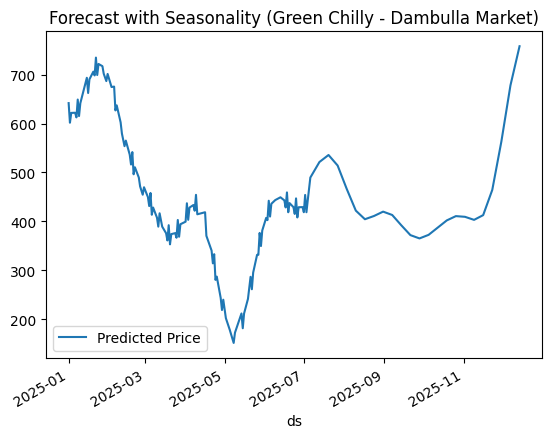

In [40]:
# Forecast plot
import matplotlib.pyplot as plt
forecast_2025 = forecast[(forecast['ds'] >= '2025-01-01') & (forecast['ds'] <= '2025-12-31')]
forecast_2025['yhat'] = forecast_2025['yhat'] * df.iloc[-1]['dollar_rate']
# model.plot(forecast_2025[['ds', 'yhat','yhat_lower','yhat_upper']])  # Print last 24 predictions for 2025
forecast_2025[['ds', 'yhat','yhat_lower','yhat_upper']].plot(x='ds', y='yhat', label='Predicted Price')
print(forecast[['yhat','ds']].tail(24))  # Print last 24 predictions for 2025
plt.title("Forecast with Seasonality (Green Chilly - Dambulla Market)")
plt.show()


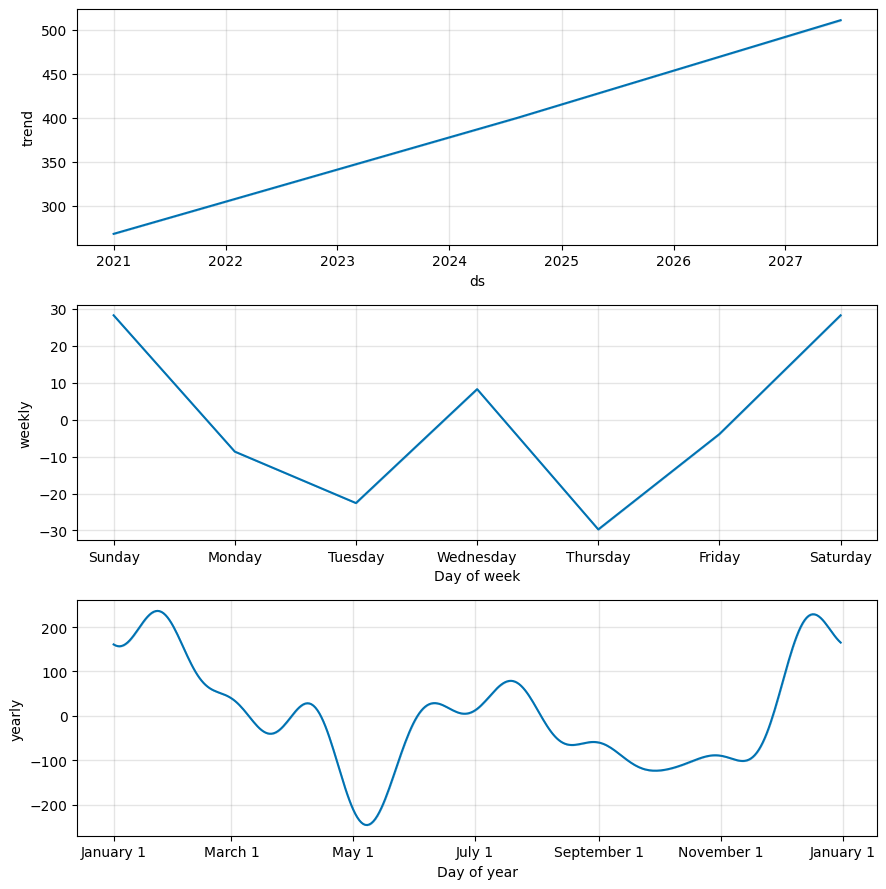

In [5]:
model.plot_components(forecast)
plt.show()
